# Age, Cholesterol, Blood Pressure, and Chest Pain in Determining Heart Disease

Andy Hong, Celine Li, Jason Shi, Ibrahim Saeed

# Introduction

Heart disease is the one of the leading causes of death for people in Canada, with 1 in 12 Canadian adults living with diagnosed heart disease. There are a number of factors that contribute to heart disease, the most notable ones being high blood pressure, high cholesterol levels, and age. Symptoms can vary between the type of heart disease and sex, but the most common symptoms include chest pain/tightness, shortness of breath, and feeling light headed and dizzy. Due to the commonality of heart disease, understanding the relationship between different factors can help people maintain a healthy cardiovascular system and decrease their chances of having heart problems.

Using the Heart Disease dataset from the Cleveland database (Janosi et al., 2007), our goal is to accurately predict whether a patient has heart disease based on our selected predictor variables. 
This dataset includes the following columns:

1. age: Age of patient 
2. sex: Gender of patient (0 = female, 1 = male)
3. cp: Chest pain severity
4. trestbps: Resting Blood Pressure (in mm/Hg)
5. chol: Serum cholestoral (in mg/dl)
6. fbs: Fasting blood sugar (0 = False, 1 = True)
7. restecg: The Resting Electrocardiographic Results
8. thalach: Maximum Heart Rate produced by patient
9. exang: Whether exercise induced angina (1 = True, 0 = False)
10. oldpeak: ST Depression Segment (induced by exercise)
11. slope: The slope of the peak exercise ST Depression Segment (1 = upslope, 2 = flat, 3 = downslope)
12. ca: Number of major blood vessels coloured by flourosopy (0-3)
13. thal: Bone Tissue Value (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. num: The diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)


For our preliminary data analysis, the variables we will be looking at are age, cholesterol level, resting blood pressure, chest pain, and num (num is the variable we need to identify whether a patient has heart disease or not). This is because our background knowledge around heart disease as well as a study done by Vanderpump, (Vanderpump et al., 2020) on risk factors for cardiovascular disease has determined that these variables are most relevant compared to the other variables when it comes to determining whether a patient has heart disease. However, we will still use the Forward Selection Method to determine the best predictor variables. But for the Forward Selection method, we will not be including the variables sex, thal, and ca becuase we cannot find how these variables are related to heart disease and believe adding these variables may harm the results provided by Forward Selection, as they seem to be irrelavant. 

Finally, after we determine the best combination of predcitor variables, we can use them to build our classifier that can predict whether or not a patient has heart disease by using the K-Nearest Neighbours classifier algorithmn. To assess the accuracy of our classifier, we will reserve and utilse a test dataset and then provide a discussion about our results. 


# Methods 

 The following report will include :
 
1.  __Preliminary Data Analysis__

    - Cleaning, tidying, and manipulating data into training and testing sets using our pre-chosen predictor vairables to be used for       our K-NN Classifier
    
2. __Predictor Variable Selection Analysis__

    - Using the Foward Selection Method to find the best set of predictor variables to create our classifier 
    
3. __Creating our KNN Classifier__

    - Performing Cross Validation analysis with our new chosen predictors, tuning a model and recipe and choosing a the best K value       to be used for the final classifier 
    
4. __Predictions on Test Data using our Model__

    - Use our model to predict on testing data in order to evaluate its accuracy and effectiveness for real-world application

# Results 

5. __Discussion__
   
    - Discuss the steps we made and the results produced by the classifier and conclude our project
    

# Preliminary Data Analysis

In [1]:
# Here we load the packages necessary to run our functions
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

__Importing Data from the Web__

In the code below, we can prove that the dataset can be read from the web. We will be naming the dataset `heart_data`. 

In [2]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                       col_names = FALSE)
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


_Figure 1: Dataset without column names_

__Cleaning and Tidying Data__

We notice that there are no column names for the data set thus we will need to add column names based on what each column represents.

In [3]:
names <- c("age","sex","cp","trestbps",
           "chol","fbs","restecg","thalach",
           "exang","oldpeak","slope",
           "ca","thal","num")

colnames(heart_data) <- names
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


_Figure 2: Dataset with column names added_

Let's now select for the columns we are interested in and tidy it up. Note that the `num` column tells us the prescence of heart disease within a patient, with a value of 0 meaning no heart disease present and a value of 1 meaning heart disease is present with greater values representing how significant the prescence is all the way up to the maximum value of 4. Let's transform the `num` column and make a new column called `diag` (abbreviation for diagnosis) of type factor so that values equal to 0 translate to `FALSE` which means no heart disease is present whereas any values greater than 0 gets the value `TRUE` which means heart diesease is present. 

In [4]:
heart_clean <- heart_data |>
                       mutate(diag = factor(ifelse(is.na(num), NA,  (num > 0)))) |>
                       select(-num,-sex,-thal,-ca)
heart_clean

age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,1,2,150,0,2.3,3,FALSE
67,4,160,286,0,2,108,1,1.5,2,TRUE
67,4,120,229,0,2,129,1,2.6,2,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,4,130,131,0,0,115,1,1.2,2,TRUE
57,2,130,236,0,2,174,0,0.0,2,TRUE
38,3,138,175,0,0,173,0,0.0,1,FALSE


_Figure 3: Dataset transformed and put into the tidy format_

Each row is one unique obsevation and each cell only contains one value. We can see from Figure 3 that there are a total of 303 unique obserations. Now let's check to see if any missing values. To do this, we can inbed the is.na() function into the sum() function. 

In [5]:
sum(is.na(heart_clean))

[1] 0

The value 0 tells us that there are no missing values in our data frame. 

__Splitting Data into Training and Testing sets__

Let's separate our data into training data testing data. The reason we do this is because we want to build our classifier based on the training data only, but we also want to evaluate our classifier and thus will need to reserve testing data to do so.

First, we set a seed so results are reproducible, and then let's summarize the training data to get a good idea of what we are working with.

In [6]:
#splitting dataframe into training, testing datasets
set.seed(1)

heart_split <- initial_split(heart_clean, prop = 3/4, strata = diag)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

heart_training

age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,1,2,150,0,2.3,3,FALSE
37,3,130,250,0,0,187,0,3.5,3,FALSE
41,2,130,204,0,2,172,0,1.4,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,4,140,241,0,0,123,1,0.2,2,TRUE
68,4,144,193,1,0,141,0,3.4,2,TRUE
57,4,130,131,0,0,115,1,1.2,2,TRUE


_Figure 4: Table showing 6 observations from heart_training_

__Summarizing data into mean, min, max, for predictions__

We then can summarize our training data into a table below.

In [7]:
#summarizing training data into a table and getting mean, min, max
heart_summarized <- heart_training %>%
group_by(diag) %>%
summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
          min_cp  = min(cp), max_cp = max(cp), mean_cp = mean(cp),
          min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol),
          min_trestbps = min(trestbps), max_trestbps = max(trestbps), 
                             mean_trestbps = mean(trestbps), no_patients = n())
heart_summarized
          
          


diag,min_age,max_age,mean_age,min_cp,max_cp,mean_cp,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,no_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,29,76,52.96748,1,4,2.788618,157,417,243.9106,94,180,130.4553,123
TRUE,35,77,57.23077,1,4,3.596154,131,407,250.5673,100,180,135.5096,104


_Figure 5: Summary table of heart_training_

In the table above we see that the min, mean, and max values for all Age, Chest pain, Cholesteral, and Blood Pressure were all greater for the TRUE group compared to the FALSE group. We can predict from this that our classifier will choose those with who are generally older, with more chest pain, and high cholesteral and blood pressure levels to have heart disease.

Additionally, we see that there are no anomalies and the number of observations with respect to the diagnosis value (whether or not the patent has heart disease) is fair. `no_patients` tells us the number of rows. 

__Visualizing data for correlation of diagnosis__

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



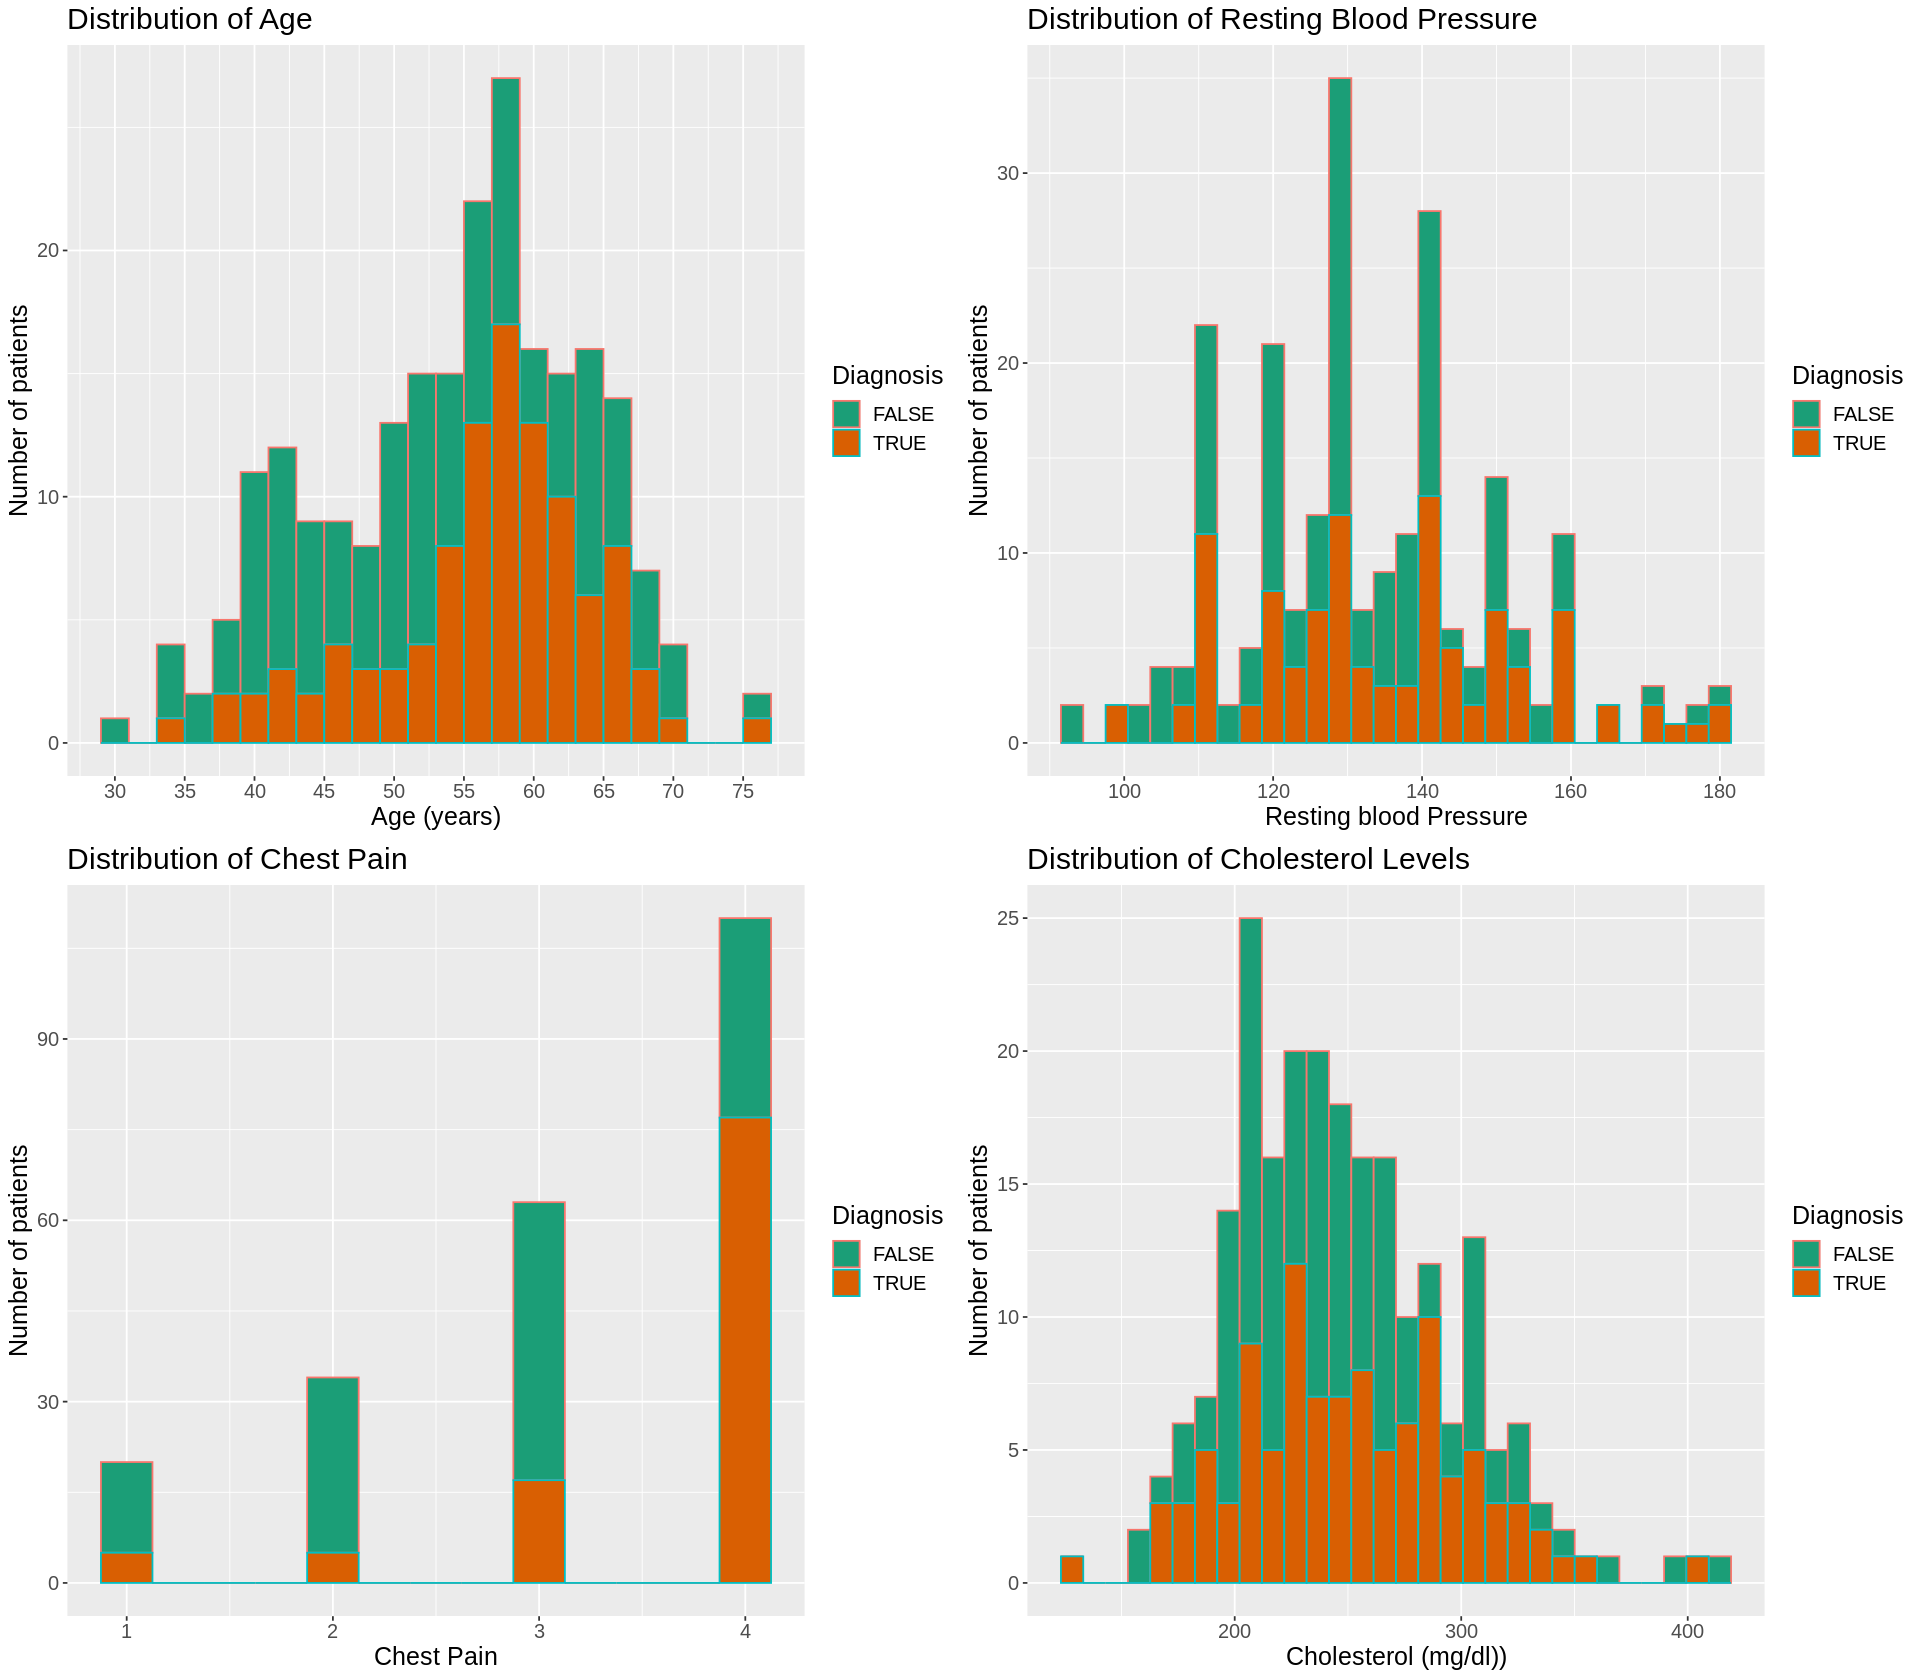

In [8]:
#Plotting this data to find correlation of diagnosis
options(repr.plot.width = 8, repr.plot.height = 7)

# RColorBrewer features for color blindness 
library(RColorBrewer)


graph <- ggplot(heart_training, aes(x = age, fill = diag, color = diag)) +
                 geom_histogram(binwidth=2) +
                 labs(x = "Age (years)", y = "Number of patients", color = "Diagnosis", fill = "Diagnosis", 
                      title = "Distribution of Age") +
                 theme(text = element_text(size = 15)) +
                 scale_x_continuous(breaks = seq(20, 80, by = 5)) +
                 scale_fill_brewer(palette = "Dark2") 

graph2 <- ggplot(heart_training, aes(x = cp, color = diag, fill = diag)) +
                 geom_histogram(bins = 13) +
                 labs(x = "Chest Pain", y = "Number of patients", color = "Diagnosis", fill = "Diagnosis", 
                      title = "Distribution of Chest Pain") +
                 theme(text = element_text(size = 15))+
                 scale_fill_brewer(palette = "Dark2") 

graph3 <- ggplot(heart_training, aes(x = trestbps, color = diag, fill = diag)) +
                 geom_histogram(binwidth=3) +
                 labs(x = "Resting blood Pressure", y = "Number of patients",
                      color = "Diagnosis", fill = "Diagnosis", title = "Distribution of Resting Blood Pressure") +
                 theme(text = element_text(size = 15))+
                 scale_fill_brewer(palette = "Dark2") 

graph4 <- ggplot(heart_training, aes(x = chol,  color = diag, fill = diag)) +
                 geom_histogram() +
                 labs(x = "Cholesterol (mg/dl))", y = "Number of patients", 
                      color = "Diagnosis", fill = "Diagnosis", title = "Distribution of Cholesterol Levels") +
                 theme(text = element_text(size = 15))+
                 scale_fill_brewer(palette = "Dark2") 

#To make visulations bigger 
options(repr.plot.width = 16, repr.plot.height = 14)
plot_grid(graph,graph2,graph3,graph4, byrow = FALSE, 
          ncol = 2, nrow = 2) 



_Figure 6: Histogram of age (top left)_  ;   _Figure 7: Histogram of Resting Blood Pressure (top right)_

_Figure 8: Histogram of Chest Pain (bottom left)_ ;  _Figure 9: Histogram of Cholestrol levels (bottom right)_

Based on Figure 6 above, we see that most of the patients in the training set have heart disease present in their late fifties, but also that most of the patients are in their late fifites. Most values are concentrated between the ages of 50 and 65 though there are a few values outside of that range. A very small portion of the patients are beyond the age of 75. 

Figure 7, representing the distribution of resting blood pressure, does not seem to have a center where people with heart disease are concentrated in. We do notice that most of the patients with a resting blood pressure beyond 160 have heart disease, though the total number of patients with a resting blood pressure beyond 160 is small.

Figure 8, or the Distribution of Chest Pain graph shows that most patients have a chest pain level of 4 which is severe chest pain. Most patients with a chest pain of value 4 are diagnosed with heart disease. 

Lastly, Figure 9, or the Distribution of Cholestrol Levels graph has most values concentrated between a cholestrol level of 200 to 300. Based on this graph, most of the patients with heart disease seem to have a cholestrol level between 200 to 300 though there is no center as the shape created from values of patients with heart disease forms a rectangular like shape. There are also some anomalies, as there are patients with a cholestrol level around 400 and near 100. 

## Predictor Variable Selection Analysis 

Now that we have our testing and training data, we want to see what combination of our predictor values will be the most accurate. 
To figure out the best predictor variables to use for our classifier, we will be using the Foward Selection method using our training data set. 
First, let's select for the predictors we are working with and get the column names of our predictor variables. We will store the relevant column names in `pred_names`.

In [9]:
options(repr.plot.width = 8, repr.plot.height = 7)


heart_sub <- heart_training |>
             select(diag, 
                    c("age","cp","trestbps",
           "chol","fbs","restecg","thalach",
           "exang","oldpeak","slope",
           "diag") )
pred_names <- colnames(heart_sub |> select(-diag))
pred_names

[1] "age"      "cp"       "trestbps" "chol"     "fbs"      "restecg" 
 [7] "thalach"  "exang"    "oldpeak"  "slope"

_Figure 10: Selected predictor variable column names_

Now let's create a model formula using the paste function. We will be naming this heart_formula.

In [10]:
heart_formula <- paste("diag", "~", paste(pred_names, collapse = "+"))
heart_formula

[1] "diag ~ age+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope"

Lastly, we will implement the code for the Foward Selection method to find the best predictors for our purposes. The scaffording for the code below can be found in the datasciencebook.ca under chapter 6.8 and was created by Campbell and Timbers (Campbell et al., 2022). 

In [11]:
set.seed(21) 

# Empty tibble to store our results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# Here, we create the model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# Here, we use a 5-fold cross validation for the sake of time and computational power 
heart_vfold <- vfold_cv(heart_sub, v = 5, strata = diag)

# Stores number of total predictors
n_total <- length(pred_names)

# Stores the selected predictors
selected <- c()

# Iterates from 1 to the total number of predictors
# Outside part of nested for loop 
for (i in 1:n_total) {    
    accs <- list()
    models <- list()
    
    # Iterates until every predictor is added 
    #Inside part of nested for loop 
    for (j in 1:length(pred_names)) {
        
        # Model string for this combination of predictors
        preds_new <- c(selected, pred_names[[j]])
        model_string <- paste("diag", "~", paste(preds_new, collapse="+"))

        # Recipe from the model string; scales all predictors 
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_sub) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # Here, we tune the classifier with our chose predictors
        # and collect the estimated accuracy
        
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        
        # Adding the results to the dataframe
        
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, pred_names[[jstar]])
    pred_names <- pred_names[-jstar]
}
accuracies


size,model_string,accuracy
<int>,<chr>,<dbl>
1,diag ~ oldpeak,0.7094203
2,diag ~ oldpeak+cp,0.7668248
3,diag ~ oldpeak+cp+exang,0.7851954
⋮,⋮,⋮
8,diag ~ oldpeak+cp+exang+age+thalach+trestbps+chol+fbs,0.7897409
9,diag ~ oldpeak+cp+exang+age+thalach+trestbps+chol+fbs+restecg,0.7853008
10,diag ~ oldpeak+cp+exang+age+thalach+trestbps+chol+fbs+restecg+slope,0.7717655


_Figure 11: Observations of accuracy with respect to number of predictors used_

Let's plot the estimated accuracy against the number of predictors to see which group of predictors lets us obtain the highest accuracy.

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diag ~ oldpeak,0.7094203
2,diag ~ oldpeak+cp,0.7668248
3,diag ~ oldpeak+cp+exang,0.7851954
4,diag ~ oldpeak+cp+exang+age,0.7894466
5,diag ~ oldpeak+cp+exang+age+thalach,0.7986342
6,diag ~ oldpeak+cp+exang+age+thalach+trestbps,0.7944840


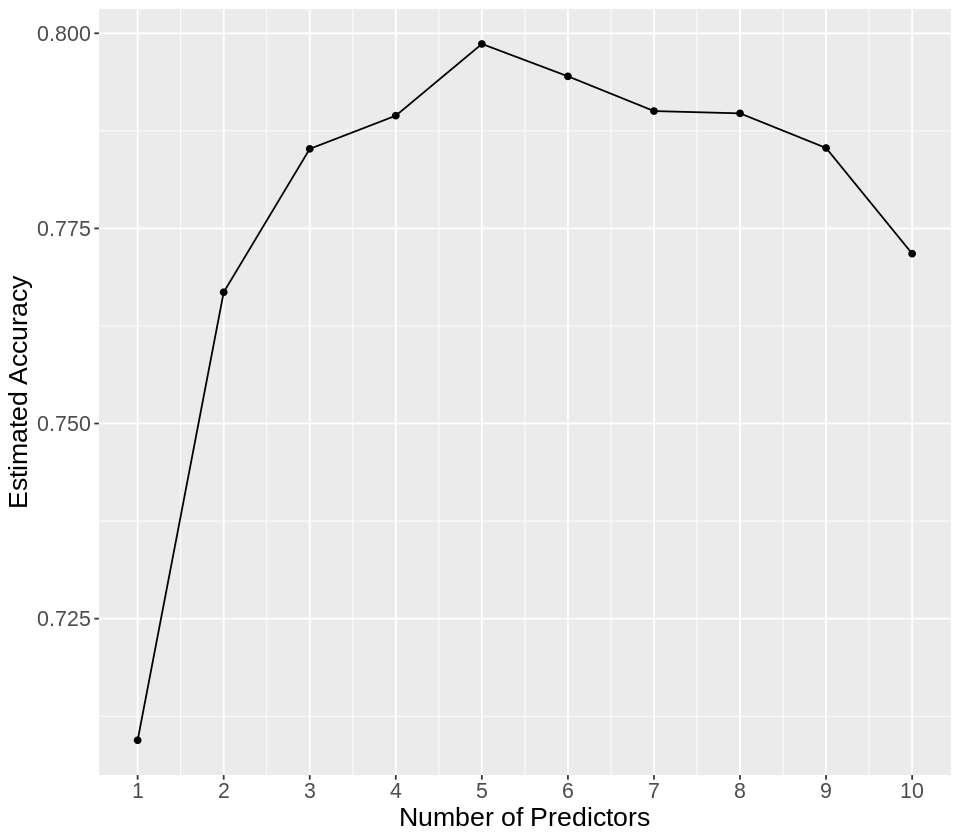

In [12]:
best_pred_plot <- accuracies |>
                  ggplot( aes(x = size, y = accuracy)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Number of Predictors", y = "Estimated Accuracy") +
                  theme(text = element_text(size = 16)) +
                  scale_x_continuous(breaks = seq(0, 10, by = 1))
best_pred_plot
head(accuracies)

_Figures 12: First 6 observations in accuracies (top), 13: Graph of Estimated Accuracy vs Number of Predictors (bottom)_

From Figure 13, we see that these 5 predictors: oldpeak (ST Depression Segment), cp (Chest Pain), exang (Exercise induced angina), age, and thalach (Maximum Heart Rate produced by patient) are the actual best combination of predictor variables to use for our classifier. This is different than our chosen variables above during our preliminary data analysis, age, bloodpressure, chest pain and cholesteral. Therefore, we will use the predictor variables that obtained the highest acccuracy from the Forward Selection method to build our classifier. 

# Creating our K-NN Classifier 

Now that we have concluded the best combination of predictor variables, let's first figure out the best $k$ value (A.K.A. amount of neighbors to predict with, using a K-NN Classifier). To do so, we first must conduct a V-fold Cross Validation. V-fold Cross Validation allows us to create a model, tune it, and graph the results to figure out the $k$ value which obtains the highest accuracy. The steps are as follows:

    1. Create a recipe called heart_recipe using the heart training and then split data into 10 v-folds
    2. Specify the model for v-fold cross validation using nearest_neighbor() and neighbors = tune() 
             for a range of possible predictor values
    3. Put the specifications and recipe in a workflow() that contains multiple data analysis steps to reduce amount code necessary
    4. Plot accuracies against each k value to determine the best k value

__Creating a recipe called heart_recipe using the heart training and then split data into 10 v-folds__

In [13]:
set.seed(1) 
heart_recipe <- recipe(diag ~ oldpeak + cp + exang + age + thalach, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
heart_recipe

heart_vfold <- vfold_cv(heart_training, v = 10, strata = diag)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

__Specifying model using nearest_neighbor()__

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

By inputting `rectangular` for `weight_func`, we make our neighbors vote once per neighbor using only straight line distance between points. We input `kknn` for the `set_engine` function to make the model use the `kknn` computational engine (for K Nearest Neighbors) and setting `set_mode` as `classification` lets our model know it's a classification problem (predicting a categorical variable based on quantifications).

__Putting specifications and recipe in a workflow__

In [15]:
set.seed(15)
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = 10) |>
  collect_metrics()


__Finding accuracies and plotting it in a line graph__

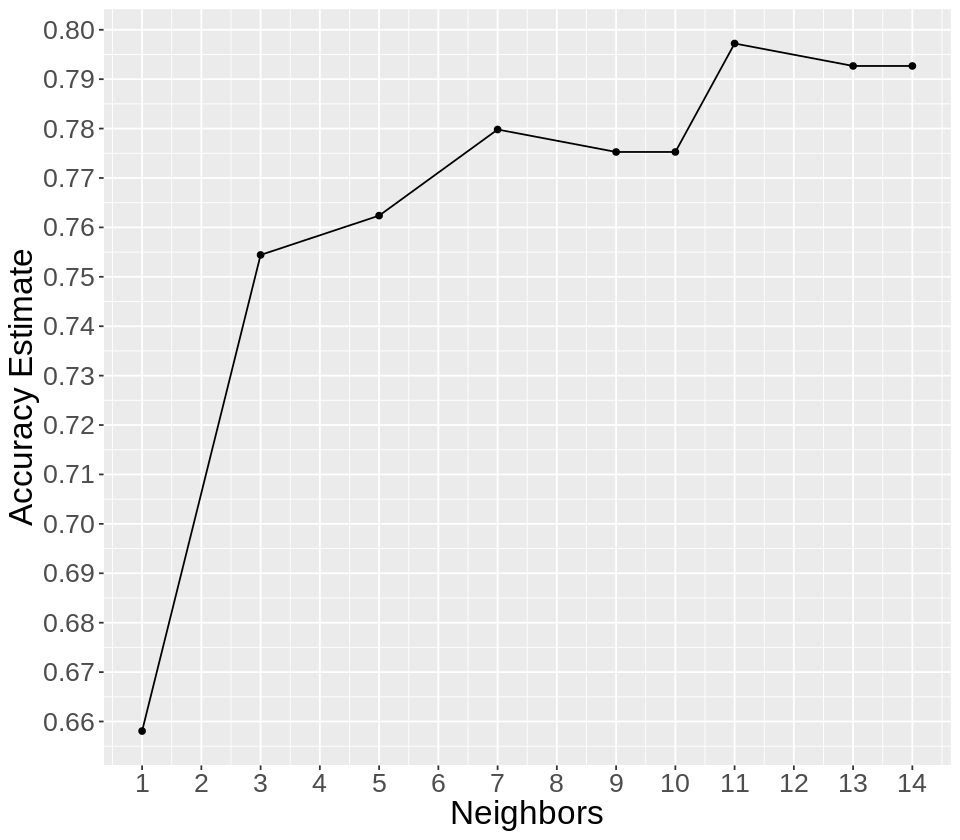

In [16]:
heart_accuracies <- knn_results %>% 
    filter(.metric == "accuracy")

options(repr.plot.width = 8, repr.plot.height = 7)
cross_val_plot <- heart_accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 15, by = 1)) +
    scale_y_continuous(breaks = seq(0.60, 0.85, by = 0.01)) +
    theme(text = element_text(size = 20))
cross_val_plot

_Figure 14: Graph of Neighbors vs Accuracy Estimate_

From Figure 14, we see that the highest accuracy $k$ value is 11. Let's save this value and name it `best_k_value` because we will need to use it when building our classifier. 


In [17]:
best_k_value <-  heart_accuracies |>
                  filter(mean == max(mean)) |> 
                  slice(1) |>
                  pull(neighbors)
best_k_value

[1] 11

__Completion of the K-NN Classifier Model__

Once again we create a workflow and recipe, only this time using the k-value 11 rather than `tune()` for the `neighbors` argument.

In [18]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_best_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = heart_training)

# Predictions on Test Data using our Model 

Finally, using our model, we can predict our value of interest on the testing data set.

In [19]:
heart_final_predictions <- predict(heart_best_fit, heart_testing) |> 
    bind_cols(heart_testing)
heart_final_predictions

.pred_class,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diag
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,56,2,120,236,0,0,178,0,0.8,1,FALSE
TRUE,62,4,140,268,0,2,160,0,3.6,3,TRUE
TRUE,57,4,120,354,0,0,163,1,0.6,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,45,1,110,264,0,0,132,0,1.2,2,TRUE
FALSE,57,2,130,236,0,2,174,0,0.0,2,TRUE
FALSE,38,3,138,175,0,0,173,0,0.0,1,FALSE


_Figure 15: Predictor class results binded with testing data_

Figure 15 displays the predictions our classifier has made for the testing set. However, there are many rows for this prediction. Fortunately, we can create a confusion matrix that displays how many values our predictor got right and wrong.

In [20]:
 heart_cm <- heart_final_predictions |> 
     conf_mat(truth = diag, estimate = .pred_class)
 heart_cm

          Truth
Prediction FALSE TRUE
     FALSE    33   12
     TRUE      8   23

_Figure 16: Basic confusion matrix_

This confusion matrix tells us that 36 patients were correctly predicted to not have heart disease, and 23 patients were correctly predicted to have heart disease. It also shows the classifiers mistakes; it predicted 12 patients did not have heart disease though they actually did, and it predicted 5 patients did have heart disease though the true value is that they did not have heart disease. This is not a great visualization so let's plot the confusion matrix below. 

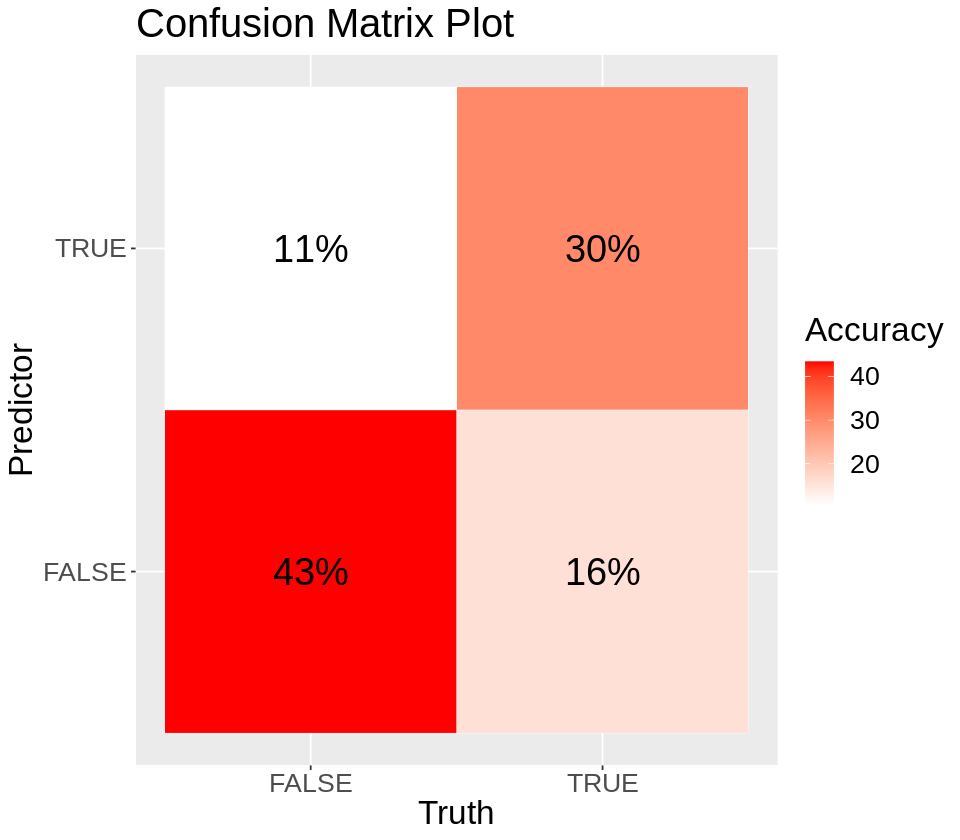

In [21]:
T <- as.factor(c("FALSE", "FALSE" , "TRUE", "TRUE"))
P <- as.factor(c("TRUE", "FALSE", "TRUE", "FALSE"))
Results      <- c((8/76)*100,(33/76)*100 , (23/76)*100, (12/76)*100)
matrix_data <- as_tibble(T, P, Results)
ggplot(data =  matrix_data, mapping = aes(x = T, y = P)) +
  geom_tile(aes(fill = Results), colour = "white") +
  geom_text(aes(label = str_c(round(Results), "%")), size = 8) +
  labs(x = "Truth", y = "Predictor", fill = "Accuracy") +
  scale_fill_gradient(low = "white", high = "red") +
  theme(text = element_text(size = 20)) +
  ggtitle("Confusion Matrix Plot") 

_Figure 17: Plot of the confusion matrix (Note that the predictor scale is flipped compared to the confusion matrix of Figure 16)_ 

This better visulation tells us that 43% of correct predictions made had patients with no heart disease, and 30% of the correct predictions made had patients with heart disease. For the incorrect predictions, our classifier thought 11% of the patients had heart disease though they do not, and our classifier also believed that 16% of the patients did not have heart disease though they actually did have heart disease. This 16% false negative rate would result is alot more consequential compared to the 11% false positive rate due to our application. It would be alot more devastating to a patient if our predictor classified them as to have heart diesease though in reality they did not. 

Now, let's see the percentage value of our classifier's accuracy on the test dataset.

In [22]:
heart_acc <- heart_final_predictions |> 
    metrics(truth = diag, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
heart_acc


.metric,.estimate
<chr>,<dbl>
accuracy,0.7368421


_Figure 18: Accuracy of model on test dataset_

Look at that! By using Forward Selection Analysis to choose the best predictors and Cross-Validation tests to determine the best k-value, it turns out our classifier based on the testing set had a total accuracy of __0.74!__

# Discussion

We first performed preliminary data analysis to clean and wrangle our data. We added column names, selected columns for the variables we are interested in, cleaned up the data into a tidy data format, and split the data into a training set and testing set. The variables we chose to use for our preliminary-analysis were age, chest pain, resting blood pressure and cholesterol level. Before performing K-NN classification, we performed Forward Variable selection to find the best predictors. We found that the actual best predictors that gave us the highest accuracy are oldpeak (ST Depression Segment), cp (Chest Pain), exang (Exercise induced angina), age, and thalach (Maximum Heart Rate produced by patient). We then performed 10-fold cross validation on our training data to find the best $k$-value that gives us the highest accuracy. We found $k$ = 11 to give us the highest accuracy and used that value to create our model. To evaluate our model on the testing data, we found out the accuracy value and visualized the results using a confusion matrix.  

We found our model to have an accuracy of 74%. This is about the same as the accuracy we expected our model to have based on the estimate accuracy provided by the Foward Selection model (_Figure 12_). Based on the amount of incorrect predictions, especially the very consequential 16% false negative rate, (_Figure 16 & Figure 17_) and our prediction accuracy (_Figure 18_), we believe our model is not adequete enough to be used in a real world setting because the room for error is too great and a false negative prediction can lead to expensive and detrimental consequences for a patient. Therefore, we believe we are unable to fullfill this paper's claim which is to take the Heart Disease dataset from the Cleveland database to create an adequate model to predict whether a patient has heart disease. Hospitals and health institutions should try and predict heart disease with an accuracy as close to 100% as possible. Regardless, this model does give a base knowledge on how to predict heart disease as well as granting an overall understanding on the various causes of heart disease. To improve our classifier, one improvement that could have been made is a bigger dataset, as our data set only included 303 observations. 

With heart disease being the second leading cause of death after cancer, it is essential that we know the factors that impact our heart’s health so we can prevent complications in the future. A better understanding of how different variables contribute to heart disease is necessary to understand how to prevent heart disease. For example, based on our preliminary analysis of chest pain (_Figure 8_), we can confidently support the claim that severe irregular chest pain is a good indicator of heart disease (Deeana, 2014). Unfortunately because our model's overall accuracy was only 74% (based on the test data) and the numerous number of mistakes our model made, it is hard to derive any useful information or relationships.

This could lead to future questions such as how can we better prevent heart disease early in age? What factors result in heart disease for young people? What is the greatest cause for heart disease? Does this data change when looking at different countries? Lastly, what other factors affect heart disease that weren’t included in the dataset?


# References

Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano , R. (2007). Heart Disease Data Set. Index of/ml/machine-learning-databases/heart-disease. Retrieved December 1, 2022, from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ 

Campbell, T., &amp; Timbers, T. (2022, September 24). Data science. Chapter 6 Classification II: evaluation &amp; tuning. 
Retrieved     December 1, 2022, from https://datasciencebook.ca/classification2.html#predictor-variable-selection 

Vanderpump, M P et al. “The development of ischemic heart disease in relation to autoimmune thyroid disease in a 20-year follow-up study of an English community.” Thyroid : official journal of the American Thyroid Association vol. 6,3 (1996): 155-60. doi:10.1089/thy.1996.6.155

Kelley, Deeanna. "Heart Disease: Causes, Prevention, and Current Research," JCCC Honors Journal: Vol. 5: Iss. 2, Article 1, (2014).
Available at: http://scholarspace.jccc.edu/honors_journal/vol5/iss2/1